In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [271]:
a = pd.read_csv('./machine_learning/toy.csv')
d = a.values
a.describe()

,var1,var2,label
count,100.000000,100.000000,100.000000
mean,0.788559,4.413645,0.500000
std,5.614973,2.288227,0.502519
min,-8.719130,2.026715,0.000000
25%,-3.944210,2.573399,0.000000
50%,1.428670,2.972816,0.500000
75%,5.917302,6.148908,1.000000
max,9.884114,10.877416,1.000000


In [284]:
x_val = np.linspace(-10, 10)
print d[:5]

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
[[  6.02494983  10.87741633   1.        ]
 [ -1.41197734   6.01971808   1.        ]
 [  6.49701735   7.50608586   1.        ]
 [  1.92901092   2.5803534    0.        ]
 [ -5.26320254   8.5527217    1.        ]]


In [273]:
def sigmoid(x):
    return 1/(1.0 + np.exp(-1.0 * x))

def tanh(x):
    return np.tanh(x)

def scaled_tanh(x):
    return (tanh(x) + 1)/2.0

6.82792246023e-05
0.73105857863


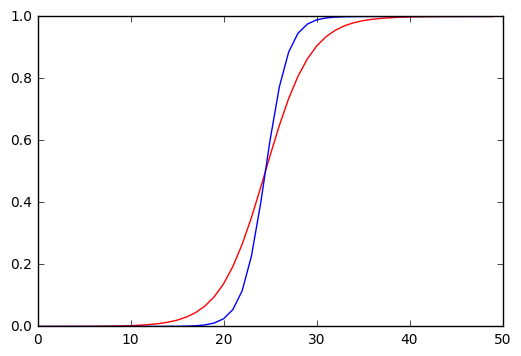

In [288]:
a = sigmoid(x_val)
b = scaled_tanh(x_val)
print a[1]
plt.plot(a, 'r')
plt.plot(b)
plt.show()

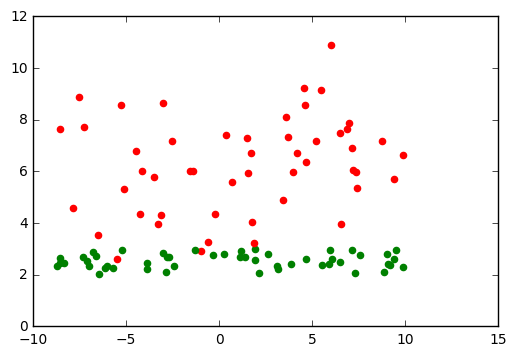

In [275]:
for ix in range(100):
    if d[ix, 2] == 1:
        plt.scatter(d[ix, 0], d[ix, 1], color='red')
    else:
        plt.scatter(d[ix, 0], d[ix, 1], color='green')

In [300]:
X = d[:, :2]
y = d[:, 2]
y= y.reshape(100,1)
print X.shape, y.shape
param_init=np.zeros((1,3))
mean=X.mean(axis=0)
std=X.std(axis=0)
X=(X-mean)/std
print X.shape
data=np.ones((100,3))

data[:,:2]=X[:,:2]
print data[:5]
print
print d[:5]
print data.shape
print param_init.shape

(100, 2) (100, 1)
(100, 2)
[[ 0.9372744   2.83902482  1.        ]
 [-0.39387949  0.70542104  1.        ]
 [ 1.02177093  1.3582652   1.        ]
 [ 0.20413222 -0.80522065  1.        ]
 [-1.08321977  1.81796979  1.        ]]

[[  6.02494983  10.87741633   1.        ]
 [ -1.41197734   6.01971808   1.        ]
 [  6.49701735   7.50608586   1.        ]
 [  1.92901092   2.5803534    0.        ]
 [ -5.26320254   8.5527217    1.        ]]
(100, 3)
(1, 3)


In [277]:

def probability(param):
    return 1/(1+np.exp(-1*(np.dot(data,param.T))))


def para_update(param,alpha):
    error=y-probability(param)
    p= np.dot(error.T,data)
    param=param+(p*alpha)

    return param

def loss(param):
     l=y*np.log(probability(param)+1e-24) + (1-y)*np.log(1-probability(param)+1e-24)
     return -1*l.sum()

def grad_descant(para_init,alpha,epochs):
    loss_para=[]
    para_hist=[]
    param=para_init
    for ix in range(epochs):
        loss_para.append(loss(param))
        para_hist.append(param)
        param=para_update(param,alpha)
        
    return para_hist,loss_para

#print para_update(param_init,0.4)
#print loss(param_init)

In [278]:
p,l=grad_descant(param_init,0.4,10)
p=np.asarray(p)
p=p.reshape(10,3)
print p.shape
print p
print l

(10, 3)
[[  0.           0.           0.        ]
 [  1.20706353  16.38396672   0.        ]
 [ -0.74727044  15.03042175   4.3012188 ]
 [ -1.55195148  13.93460925   6.36133401]
 [ -1.37597916  13.62736231   6.98323627]
 [ -0.77775526  13.83496313   6.82144361]
 [ -0.98120219  13.55117013   7.34880181]
 [ -0.57636696  13.91317323   6.92531181]
 [ -0.91232666  13.61226852   7.46941294]
 [ -0.54899021  14.01482227   6.97910695]]
[69.314718055994533, 64.425163584693323, 20.658283483634523, 9.7798697829916108, 9.1648816012910128, 9.0551518442706218, 8.9773483729799732, 9.1090385003399295, 8.9904693070163262, 9.1366643114323782]


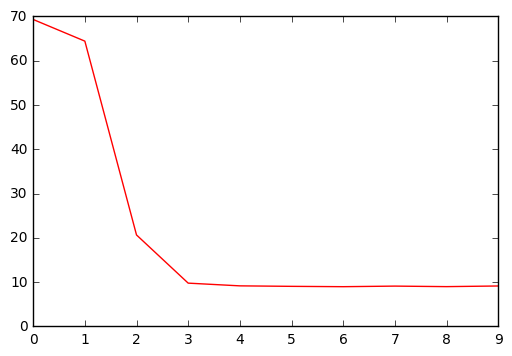

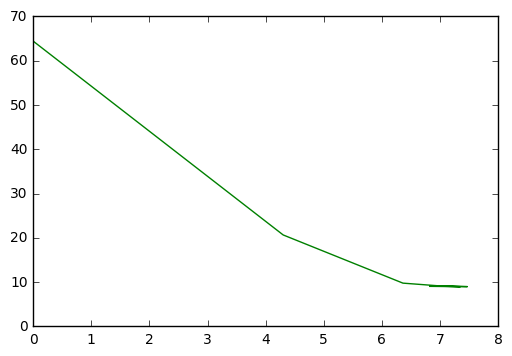

In [279]:
plt.figure(0)
plt.plot(l,color='red')
plt.show()
plt.figure(1)
plt.plot(p[:,2],l,color='green')
plt.show()

In [310]:
def predict(num):
     #num=(num-mean)/std
     y=p[9,0]*num[0]+p[9,1]*num[1]+p[9,2]
     
    
     if y>0:
            print "red cluster"
     else:
            print "green cluster"

In [311]:
n=np.asarray([0,0])
predict(n)
#in accordance with orignal data

red cluster


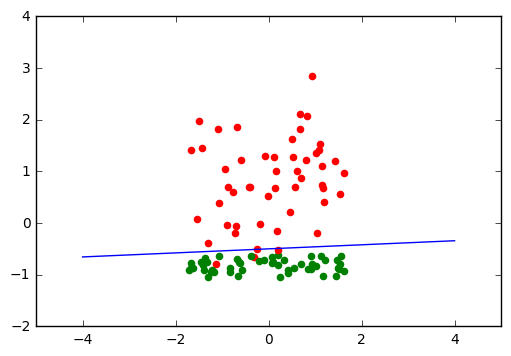

In [313]:
#y=[]
plt.figure(0)
for ix in range(100):
    if y[ix] == 1:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')  
ap=np.linspace(-4,4)
k=(-p[9,2]-p[9,0]*ap)/p[9,1]
plt.plot(ap,k,'b')